In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [100]:
import mailbox
mboxfile = "Dark004.mbox"
mbox = mailbox.mbox(mboxfile)
mbox

In [102]:
for key in mbox[0].keys():
    print (key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
X-Google-DKIM-Signature
X-Gm-Message-State
X-Google-Smtp-Source
MIME-Version
X-Received
Message-ID
Date
Subject
From
To
Content-Type


### data transforamtion
#subject, from, date, to, label, and thread. 

dfs.tocs

In [104]:
import csv
with open('mailbox.csv', 'w') as outputfile:
    writer = csv.writer(outputfile)
    writer.writerow(['subject', 'from', 'date', 'to', 'label', 'thread'])
    for message in mbox:
        writer.writerow([
            message['subject'],
            message['from'],
            message['date'],
            message['to'],
            message['X-Gmail-Labels'],
            message['X-GM-Third']
        ]
                       )

In [105]:
dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to',
'label', 'thread'])

In [108]:
dfs.dtypes

subject    object
from       object
date       object
to         object
label      object
thread     object
dtype: object

In [110]:
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [58]:
#sn.barplot(data='mbox.csv')
#plt.show()

In [120]:
dfs.head(100)

,subject,from,date,to,label,thread
0,subject,from,NaT,to,label,thread
1,Your Google data is ready to download,Google Takeout <noreply@google.com>,2025-10-14 03:18:44+00:00,darkgen18@gmail.com,"Inbox,Opened,Category Updates",NaN
2,NaN,dark gen <darkgen18@gmail.com>,2025-10-10 04:00:59+00:00,rohithbs91@gmail.com,"Archived,Sent",NaN
3,"Hey dark, welcome to Gemini",Google Gemini <google-gemini-noreply@google.com>,2025-10-12 23:04:01+00:00,darkgen18@gmail.com,"Inbox,Opened,Category Updates",NaN
4,Security alert,Google <no-reply@accounts.google.com>,2025-10-10 03:58:36+00:00,darkgen18@gmail.com,"Inbox,Opened,Category Updates",NaN
5,NaN,"""Suhruth S"" <25dipcse005@bnmit.in>",2025-10-14 03:35:04+00:00,"""Darkgen18@gmail.com"" <Darkgen18@gmail.com>","Inbox,Opened,Category Personal",NaN
6,NaN,dark gen <darkgen18@gmail.com>,2025-10-14 03:16:19+00:00,25dipcse002@bnmit.in,"Archived,Sent,Opened",NaN
7,NaN,dark gen <darkgen18@gmail.com>,2025-10-10 03:59:28+00:00,25dipcse002@bnmit.in,"Archived,Sent",NaN
8,Archive of Google data requested,Google <no-reply@accounts.google.com>,2025-10-14 03:37:49+00:00,darkgen18@gmail.com,"Inbox,Important,Category Updates,Unread",NaN
9,Archive of Google data requested,Google <no-reply@accounts.google.com>,2025-10-14 03:18:22+00:00,darkgen18@gmail.com,"Inbox,Opened,Category Updates",NaN


In [122]:
dfs.dtypes

subject                 object
from                    object
date       datetime64[ns, UTC]
to                      object
label                   object
thread                  object
dtype: object

In [124]:
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))


In [126]:
dfs = dfs[dfs['date'].notna()]

In [128]:
dfs.to_csv('gmail.csv')

In [130]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 1 to 25
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  16 non-null     object             
 1   from     25 non-null     object             
 2   date     25 non-null     datetime64[ns, UTC]
 3   to       25 non-null     object             
 4   label    25 non-null     object             
 5   thread   0 non-null      object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 1.4+ KB


In [132]:
dfs.head(6)

,subject,from,date,to,label,thread
1,Your Google data is ready to download,Google Takeout <noreply@google.com>,2025-10-14 03:18:44+00:00,darkgen18@gmail.com,"Inbox,Opened,Category Updates",NaN
2,NaN,dark gen <darkgen18@gmail.com>,2025-10-10 04:00:59+00:00,rohithbs91@gmail.com,"Archived,Sent",NaN
3,"Hey dark, welcome to Gemini",Google Gemini <google-gemini-noreply@google.com>,2025-10-12 23:04:01+00:00,darkgen18@gmail.com,"Inbox,Opened,Category Updates",NaN
4,Security alert,Google <no-reply@accounts.google.com>,2025-10-10 03:58:36+00:00,darkgen18@gmail.com,"Inbox,Opened,Category Updates",NaN
5,NaN,"""Suhruth S"" <25dipcse005@bnmit.in>",2025-10-14 03:35:04+00:00,"""Darkgen18@gmail.com"" <Darkgen18@gmail.com>","Inbox,Opened,Category Personal",NaN
6,NaN,dark gen <darkgen18@gmail.com>,2025-10-14 03:16:19+00:00,25dipcse002@bnmit.in,"Archived,Sent,Opened",NaN


In [134]:
dfs['timeofday']=dfs['date'].apply(lambda x: x.hour)
print(dfs['timeofday'])

1      3
2      4
3     23
4      3
5      3
6      3
7      3
8      3
9      3
10     3
11     4
12     4
13     3
14     4
15     4
16     4
17     4
18     3
19     3
20     4
21     3
22     3
23     3
24     3
25     3
Name: timeofday, dtype: int64


In [136]:
dfs['hour']=dfs['date'].apply(lambda x: x.hour)
print(dfs['hour'])

1      3
2      4
3     23
4      3
5      3
6      3
7      3
8      3
9      3
10     3
11     4
12     4
13     3
14     4
15     4
16     4
17     4
18     3
19     3
20     4
21     3
22     3
23     3
24     3
25     3
Name: hour, dtype: int64


In [138]:
dfs['year_int']=dfs['date'].apply(lambda x:x.year)
print(dfs['year_int'])

1     2025
2     2025
3     2025
4     2025
5     2025
6     2025
7     2025
8     2025
9     2025
10    2025
11    2025
12    2025
13    2025
14    2025
15    2025
16    2025
17    2025
18    2025
19    2025
20    2025
21    2025
22    2025
23    2025
24    2025
25    2025
Name: year_int, dtype: int64


In [82]:
print(dfs['date'])
dfs.index=dfs['date']


1   2025-10-10 04:00:59+00:00
2   2025-10-10 03:58:36+00:00
3   2025-10-10 04:00:09+00:00
4   2025-10-10 03:59:57+00:00
5   2025-10-10 03:59:28+00:00
6   2025-10-10 04:01:27+00:00
Name: date, dtype: datetime64[ns, UTC]


In [84]:
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs['label'].value_counts())

Fri, 10 Oct 2025 03:58 AM
Fri, 10 Oct 2025 04:01 AM
label
Archived,Sent                    3
Inbox,Category Updates,Unread    3
Name: count, dtype: int64


In [86]:
print(dfs['label'])
sent=dfs[dfs['label']=='sent']
'''print(sent)'''

date
2025-10-10 04:00:59+00:00                    Archived,Sent
2025-10-10 03:58:36+00:00    Inbox,Category Updates,Unread
2025-10-10 04:00:09+00:00    Inbox,Category Updates,Unread
2025-10-10 03:59:57+00:00                    Archived,Sent
2025-10-10 03:59:28+00:00                    Archived,Sent
2025-10-10 04:01:27+00:00    Inbox,Category Updates,Unread
Name: label, dtype: object


'print(sent)'

In [88]:
import pytz
import datetime

def plot_todo_vs_year(df, ax, color='CO', s=0.5, title=''):
    ind=np.zeros(len(df), dtype='bool')
    est=pytz.timezone('US/Eastern')
    df[~ind].plot.scatter('year_int', 'timeofday', s=s, alpha=0.6, ax=ax,color=color)
    ax.set_ylim(0,24)
    ax.yaxis.set_major_locator(MaxNLocator(8))
    ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts,24))), "%H").strftime("%I %p")
                    for ts in ax.get_yticks()
                   ]);
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title(title)
    ax.grid(ls=':',color='k')
    return ax

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['CO']

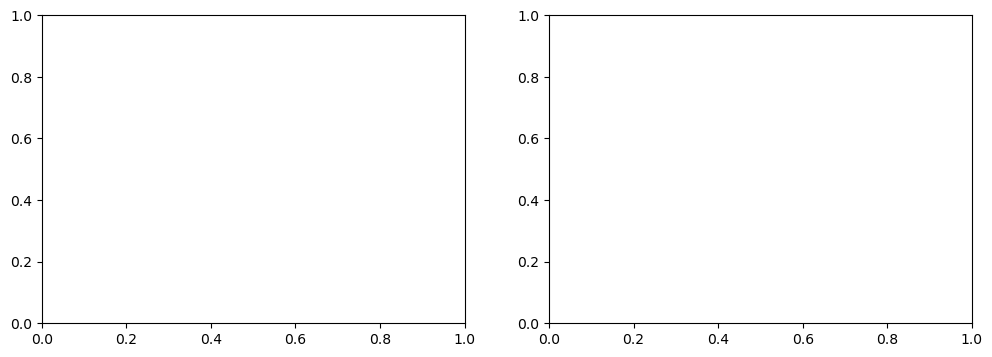

In [94]:
flg, ax= plt.subplots(nrows=1,ncols=2,figsize=(12,4))
plot_todo_vs_year(sent,ax[0],title='Sent')
plot_todo_vs_year(sent,ax[0],title='Received')

In [176]:

dfs.columns

Index(['subject', 'from', 'date', 'label', 'thread', 'timeofday', 'hour',
       'year_int'],
      dtype='object')

In [142]:

import re

def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string)
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan
     

In [144]:
dfs['from'] = dfs['from'].apply(lambda x: extract_email_ID(x))
     

In [185]:
myemail = '25dipcse002@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [187]:
dfs.drop(columns='to', inplace=True)

KeyError: "['to'] not found in axis"

In [189]:

dfs.head(10)
     

,subject,from,date,label,thread,timeofday,hour,year_int
1,Your Google data is ready to download,noreply@google.com,2025-10-14 08:48:44+05:30,inbox,NaN,8.812222,8,2025
2,NaN,darkgen18@gmail.com,2025-10-10 09:30:59+05:30,inbox,NaN,9.516389,9,2025
3,"Hey dark, welcome to Gemini",google-gemini-noreply@google.com,2025-10-13 04:34:01+05:30,inbox,NaN,4.566944,4,2025
4,Security alert,no-reply@accounts.google.com,2025-10-10 09:28:36+05:30,inbox,NaN,9.476667,9,2025
5,NaN,25dipcse005@bnmit.in,2025-10-14 09:05:04+05:30,inbox,NaN,9.084444,9,2025
6,NaN,darkgen18@gmail.com,2025-10-14 08:46:19+05:30,inbox,NaN,8.771944,8,2025
7,NaN,darkgen18@gmail.com,2025-10-10 09:29:28+05:30,inbox,NaN,9.491111,9,2025
8,Archive of Google data requested,no-reply@accounts.google.com,2025-10-14 09:07:49+05:30,inbox,NaN,9.130278,9,2025
9,Archive of Google data requested,no-reply@accounts.google.com,2025-10-14 08:48:22+05:30,inbox,NaN,8.806111,8,2025
10,NaN,darkgen18@gmail.com,2025-10-14 08:47:08+05:30,inbox,NaN,8.785556,8,2025


In [191]:
import datetime 
import pytz

def refactor_timezone(x):
  est = pytz.timezone('Asia/kolkata')
  return x.astimezone(est)

In [193]:
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [225]:
dfs['dayofweek'] = dfs['date'].dt.day_name()
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday', 'Sunday'], ordered=True)

In [227]:
dfs['dayofweek']

1     Tuesday
2      Friday
3      Monday
4      Friday
5     Tuesday
6     Tuesday
7      Friday
8     Tuesday
9     Tuesday
10    Tuesday
11     Friday
12     Friday
13    Tuesday
14     Friday
15     Friday
16     Friday
17     Friday
18    Tuesday
19    Tuesday
20     Friday
21     Friday
22    Tuesday
23    Tuesday
24    Tuesday
25    Tuesday
Name: dayofweek, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [166]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [168]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [172]:
dfs.head()

,subject,from,date,label,thread,timeofday,hour,year_int
1,Your Google data is ready to download,noreply@google.com,2025-10-14 08:48:44+05:30,inbox,NaN,8.812222,8,2025
2,NaN,darkgen18@gmail.com,2025-10-10 09:30:59+05:30,inbox,NaN,9.516389,9,2025
3,"Hey dark, welcome to Gemini",google-gemini-noreply@google.com,2025-10-13 04:34:01+05:30,inbox,NaN,4.566944,4,2025
4,Security alert,no-reply@accounts.google.com,2025-10-10 09:28:36+05:30,inbox,NaN,9.476667,9,2025
5,NaN,25dipcse005@bnmit.in,2025-10-14 09:05:04+05:30,inbox,NaN,9.084444,9,2025


In [203]:
dfs['date_only'] = dfs['date'].dt.date

In [215]:
avg=(dfs['from'].count())/dfs['date_only'].nunique()
print("average Emails per day:",avg)
avg

average Emails per day: 8.333333333333334


8.333333333333334

In [221]:
avg1=(dfs['from'].count())/(dfs['date_only'].nunique()*24)
print("average Emails per day:",avg1)
avg1

average Emails per day: 0.3472222222222222


0.3472222222222222

<Axes: xlabel='dayofweek'>

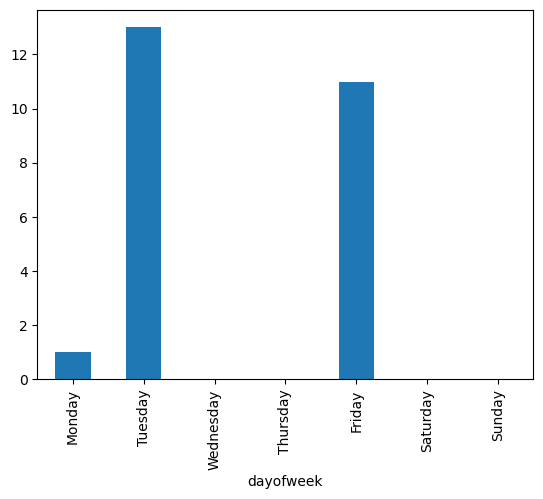

In [235]:
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [ ]:
sent = dfs[dfs